In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("C:/Users/Don Augwin/OneDrive/Datasets/TATASTEEL.NS.csv")

In [4]:
# Prepare data
data = df[['Date', 'Close']]

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Set 'Date' column as index
data.set_index('Date', inplace=True)

C:\Users\DONAUG~1\AppData\Local\Temp/ipykernel_5320/3803081276.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')


In [5]:
# Shift the 'Close' price to create lag features
for i in range(1, 6):
    data[f'lag_{i}'] = data['Close'].shift(i)

# Drop NaN values due to lag
data.dropna(inplace=True)

C:\Users\DONAUG~1\AppData\Local\Temp/ipykernel_5320/595656326.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'lag_{i}'] = data['Close'].shift(i)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [6]:
# Splitting data into features and target variable
X = data.drop('Close', axis=1)
y = data['Close']

# Normalizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)

# Build a simple feedforward neural network
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, verbose=0)

# Predictions
dl_pred = model.predict(X_test)

44/44 [==============================] - 0s 2ms/step


In [9]:
# Evaluate the model using R2 score
r2_dl = r2_score(y_test, dl_pred)
print("Deep Learning - R2 Score:", r2_dl)


Deep Learning - R2 Score: 0.9964022661148908


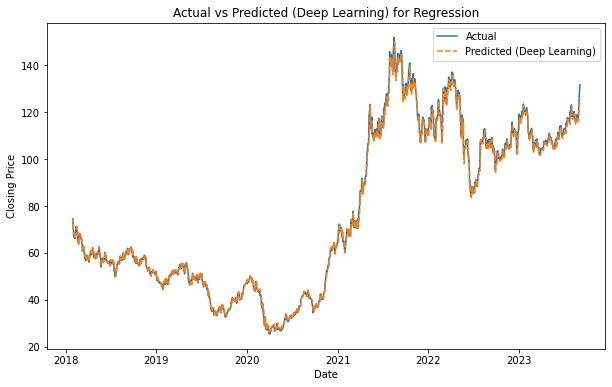

In [10]:
# Plotting actual vs predicted for Deep Learning
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, dl_pred, label='Predicted (Deep Learning)', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted (Deep Learning) for Regression')
plt.legend()
plt.show()

In [11]:
#Using neural networks the prediction is perfect with 99.64%